In [1]:
import pandas as pd
import numpy as np
from keras.layers import Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import shutil
from tensorflow.keras import layers,Sequential

In [2]:
image_size=255 # pixel size
channel=3 # RGB

In [3]:
data=tf.keras.preprocessing.image_dataset_from_directory(directory='Plant',
                                                        batch_size=35,
                                                         image_size=(255,255),
                                                         seed=123)

Found 2152 files belonging to 3 classes.


In [4]:
classes=data.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
classes[0]

'Potato___Early_blight'

In [6]:
data.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
for image_batch,image_labels in data.take(1):
    print(image_batch.shape)
    print(image_labels.numpy())

(35, 255, 255, 3)
[0 1 1 0 0 0 0 1 1 0 0 2 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1]


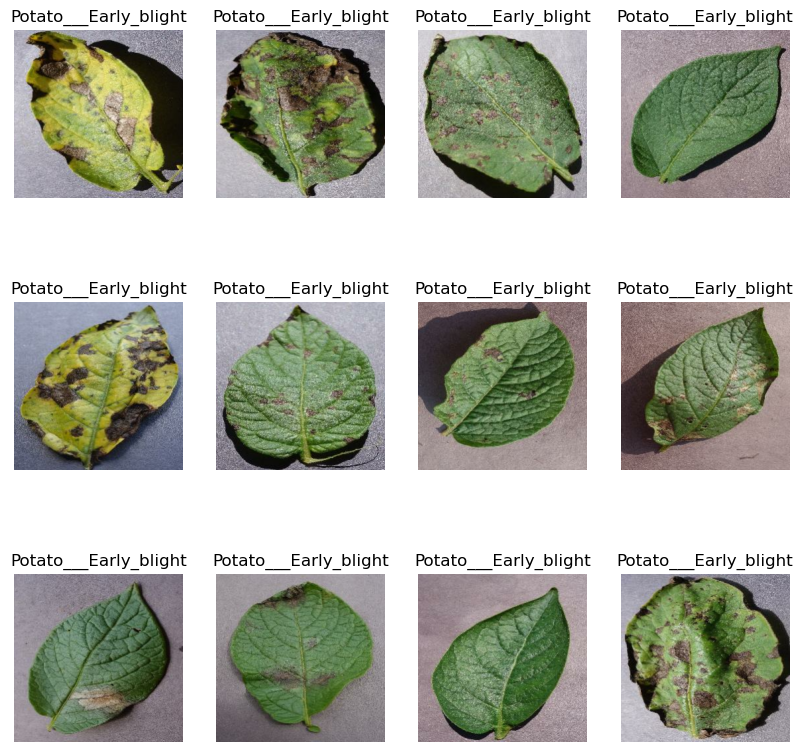

In [8]:
plt.figure(figsize=(10,10))
for image_batch,image_label in data.take(1):
    for i in range(12):        
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(classes[image_label[1]])
        plt.axis('off')

In [9]:
len(data)

62

In [10]:
train_size=0.8
len(data)*train_size

49.6

In [11]:
train=data.take(49)

In [12]:
test=data.skip(49)

In [13]:
len(test)

13

In [14]:
val_size=0.1
val=len(data)*val_size
val

6.2

In [15]:
val=test.take(6)
len(val)

6

In [16]:
test=test.skip(6)
len(test)

7

In [17]:
train_data=train.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_data=test.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_data=val.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [18]:
resize_scale=Sequential([
    layers.experimental.preprocessing.Resizing(255,255),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [19]:
rotation_aug=Sequential([
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
model=tf.keras.models.Sequential([
    resize_scale,
    rotation_aug,
    layers.Conv2D(30,kernel_size=(3,3),activation='relu',input_dim=(255,255,3)),
    layers.MaxPool2D(),
    layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(62,'relu'),
    layers.Dense(3,activation='softmax')
    
])

model.build(input_shape=(32,255,255,3))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 255, 255, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 253, 253, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 30)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 50)      13550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 50)       0         
 2D)                                                  

In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [23]:
model.fit(train_data,batch_size=32,epochs=10,validation_data=val_data,verbose=1)

Epoch 1/10
49/49 [==============================] - 607s 11s/step - loss: 0.8138 - accuracy: 0.7085 - val_loss: 0.4415 - val_accuracy: 0.8524
Epoch 2/10
49/49 [==============================] - 513s 10s/step - loss: 0.4322 - accuracy: 0.8484 - val_loss: 0.3787 - val_accuracy: 0.8762
Epoch 3/10
49/49 [==============================] - 410s 8s/step - loss: 0.4019 - accuracy: 0.8519 - val_loss: 0.3432 - val_accuracy: 0.8619
Epoch 4/10
49/49 [==============================] - 370s 7s/step - loss: 0.2558 - accuracy: 0.8945 - val_loss: 0.3417 - val_accuracy: 0.8524
Epoch 5/10
49/49 [==============================] - 349s 7s/step - loss: 0.1963 - accuracy: 0.9155 - val_loss: 0.2197 - val_accuracy: 0.9190
Epoch 6/10
49/49 [==============================] - 365s 8s/step - loss: 0.1790 - accuracy: 0.9347 - val_loss: 0.2135 - val_accuracy: 0.8905
Epoch 7/10
49/49 [==============================] - 282s 6s/step - loss: 0.1321 - accuracy: 0.9522 - val_loss: 0.2149 - val_accuracy: 0.9048
Epoch 8/10


In [24]:
loss=model.history.history['loss']

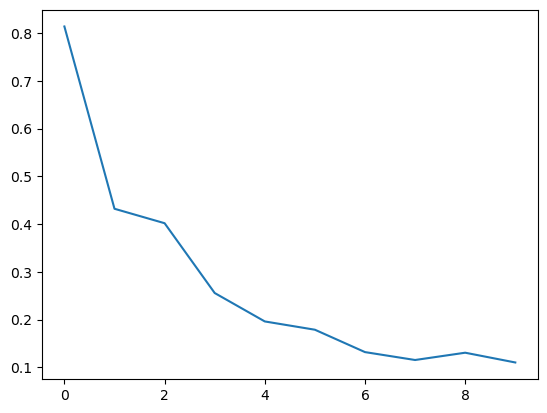

In [25]:
plt.plot(loss)

In [26]:
model.evaluate(test_data)

7/7 [==============================] - 57s 815ms/step - loss: 0.1549 - accuracy: 0.9471


[0.15488220751285553, 0.9471365809440613]

In [27]:
for batch,label in test_data.take(1):
    print(batch.shape)
    print(label.numpy())

(35, 255, 255, 3)
[0 1 0 0 2 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 2 1 1 0 1 1 0 1 2 1 0 1 0 0]


In [28]:
for batch,label in val_data.take(1):
    print(batch.shape)
    print(label.numpy())

(35, 255, 255, 3)
[1 0 1 0 0 1 1 1 1 0 1 2 1 0 0 0 2 0 0 1 1 0 1 0 2 1 0 0 1 1 0 1 0 0 0]


first image to predict
actual label: Potato___Early_blight
2/2 [==============================] - 5s 151ms/step
predicted label: Potato___Early_blight
confidence: 0


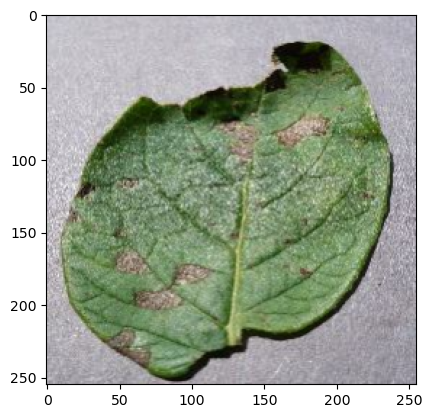

In [29]:
for image_batch,image_label in test_data.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=image_label[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:', classes[first_label])
    
    prediction=model.predict(image_batch)
    print('predicted label:',classes[np.argmax(prediction[0])])
#     print('confidence:',np.argmax(prediction[0]))

In [68]:
def prediction(model,image):
    prepro=tf.keras.preprocessing.image.img_to_array(image)
    dim=tf.expand_dims(prepro,0)
    
    pred=model.predict(dim)
    
    predicted_classes=classes[np.argmax(pred[0])]
    confidance=round(100*(np.max(pred[0])),2)
    return predicted_classes, confidance

1/1 [==============================] - 0s 78ms/step


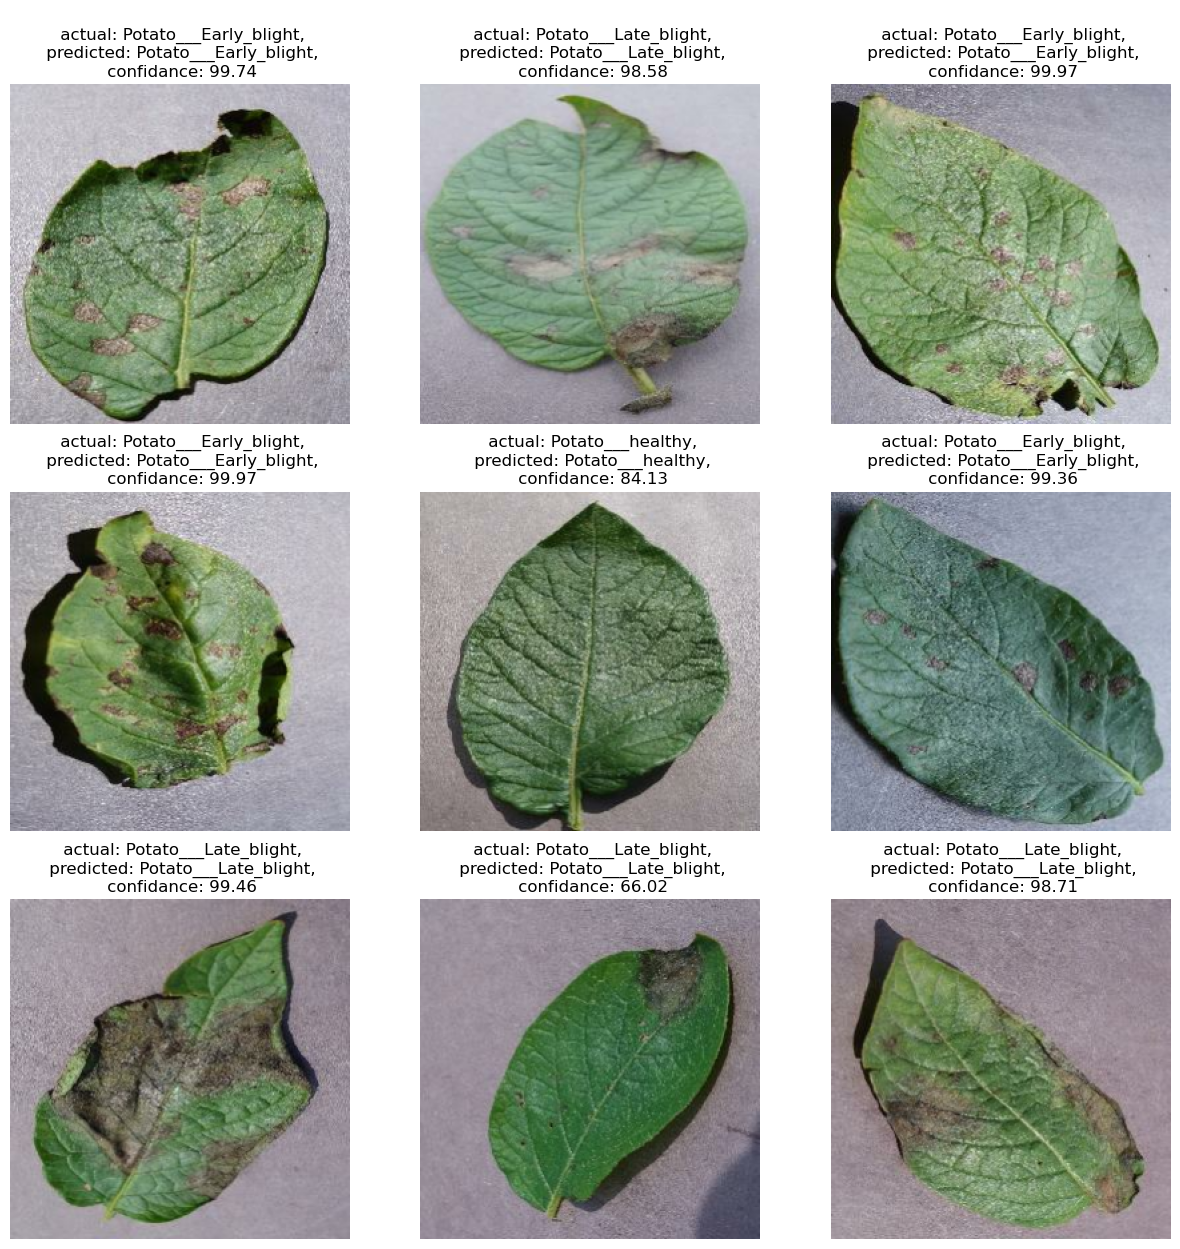

In [81]:
plt.figure(figsize=(15,15))
for image_batch,image_label in test_data.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        actual_class=classes[image_label[i]]
        
        pred,confidance=prediction(model,image_batch[i].numpy())
        plt.title(f'\n actual: {actual_class},\n predicted: {pred},\n confidance: {confidance}')
        
        plt.axis('off')